<a href="https://colab.research.google.com/github/CHIZIGWE/TSK/blob/main/Captify_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solution Notebook**

**Loading Libraries**

In [ ]:
#Importing data wrangling and visualisation libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from numpy.ma.core import outer
from decimal import Decimal

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from datetime import  datetime as dt
from dateutil import relativedelta
pd.options.display.float_format = '{:.2f}'.format #To suppress scientific notation

In [ ]:
#Loading the three datasets
Deal_Performance = pd.read_excel(r'/content/drive/MyDrive/Captify_Task/deal-performance-data.xlsx')

bid_blue = pd.read_csv(r"/content/drive/MyDrive/Captify_Task/deal-bid-data-bluessp.csv")

bid_red = pd.read_csv(r"/content/drive/MyDrive/Captify_Task/deal-bid-data-redssp.csv")

Sanity Check

In [ ]:
#Creating Function to Automate Sanity Check
def sanity_check(Dataset, Dataset_Name):
    print(Dataset_Name, 'Sanity Check: \n\n')
    print(f'{Dataset_Name} Rows and Columns: \n' ,Dataset.shape, '\n')
    print(f'{Dataset_Name} Column information: \n')
    Dataset.info()
    print('\n')
    print(f'{Dataset_Name} Missing information: \n',Dataset.isnull().sum(), '\n')
    print(f'{Dataset_Name} Statistical Summary: \n',Dataset.describe(), '\n')
    print(f'End of {Dataset_Name} sanity check \n')


In [ ]:
#Sanity Check for Bid Red
sanity_check(bid_red, 'Bid Red')


Bid Red Sanity Check: 


Bid Red Rows and Columns: 
 (1132, 4) 

Bid Red Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   deal_id      1132 non-null   object 
 1   month        1132 non-null   object 
 2   bid_request  1132 non-null   float64
 3   bids         1132 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 35.5+ KB


Bid Red Missing information: 
 deal_id        0
month          0
bid_request    0
bids           0
dtype: int64 

Bid Red Statistical Summary: 
           bid_request           bids
count         1132.00        1132.00
mean   95372278085.95  5870149054.87
std   110894431149.78  7107228982.18
min            160.00           0.00
25%            160.00           0.00
50%    55682516225.50  3144363396.00
75%   163250000000.00 10365478039.25
max   557000000000.00 44441690515.00 

En

In [ ]:
#Bid bld blue Sanity Check
sanity_check(bid_blue, 'Bid Blue')

Bid Blue Sanity Check: 


Bid Blue Rows and Columns: 
 (748, 4) 

Bid Blue Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   deal_id      748 non-null    object 
 1   month        748 non-null    object 
 2   bid_request  748 non-null    float64
 3   bids         748 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 23.5+ KB


Bid Blue Missing information: 
 deal_id        0
month          0
bid_request    0
bids           0
dtype: int64 

Bid Blue Statistical Summary: 
           bid_request           bids
count          748.00         748.00
mean   83372563851.83  6156973885.02
std   104246600250.14  7556392469.17
min            160.00           0.00
25%            160.00           0.00
50%    34921890202.00  3133102090.00
75%   143500000000.00 10501080076.25
max   476000000000.00 37064307785.00 



In [ ]:
#Deal Performance sanity check
sanity_check(Deal_Performance, 'Deal Performance')


Deal Performance Sanity Check: 


Deal Performance Rows and Columns: 
 (1980, 19) 

Deal Performance Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   deal_id          1980 non-null   object        
 1   deal_name        1980 non-null   object        
 2   month            1980 non-null   datetime64[ns]
 3   segment_type     1980 non-null   object        
 4   ssp              1980 non-null   object        
 5   advertiser       1980 non-null   object        
 6   vertical         1980 non-null   object        
 7   office           1980 non-null   object        
 8   tier             1980 non-null   object        
 9   media_type       1980 non-null   object        
 10  kpi              1980 non-null   object        
 11  kpi_value        1980 non-null   float64       
 12  gross_spend      1980 n

The Datasets are mostly clean.

However, in the bid datasets, the column depicting the respective bids' dates is an object datatype.

This has to be changed to allow seamless integration with the larger Deal performance dataset.

In [ ]:
#Converting both to datetime datatypes
bid_red['month'] = pd.to_datetime(bid_red['month'])
bid_blue['month'] = pd.to_datetime(bid_blue['month'])

In [ ]:
#Checking that datatype has taken place
bid_blue.info()
print('\n')
bid_red.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   deal_id      748 non-null    object        
 1   month        748 non-null    datetime64[ns]
 2   bid_request  748 non-null    float64       
 3   bids         748 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 23.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   deal_id      1132 non-null   object        
 1   month        1132 non-null   datetime64[ns]
 2   bid_request  1132 non-null   float64       
 3   bids         1132 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 35.5+ KB


Check the first five rows of the bid dataset to confirm structural changes

In [ ]:
bid_red.head()



,deal_id,month,bid_request,bids
0,Deal_149,2024-01-01,160.00,0
1,Deal_149,2024-01-05,160.00,2320359348
2,Deal_222,2024-01-02,45169671695.00,6431140982
3,Deal_222,2024-01-04,74806028011.00,5821454587
4,Deal_222,2024-01-09,68845194016.00,0


In [ ]:
bid_blue.head()

,deal_id,month,bid_request,bids
0,Deal_102,2024-01-01,160.00,11418560961
1,Deal_102,2024-01-02,160.00,4218636088
2,Deal_102,2024-01-04,287000000000.00,7902414504
3,Deal_102,2024-01-05,160.00,30286237905
4,Deal_102,2024-01-06,201000000000.00,0


To develop a full picture of the bidding metrics we concatenate the datasets

In [ ]:
#Concatenating the bid Datasets
combined_bid = pd.concat([bid_blue, bid_red])

In [ ]:
#Sanity Check on the Concatenated Dataset
sanity_check(combined_bid, 'Combined Bid')

Combined Bid Sanity Check: 


Combined Bid Rows and Columns: 
 (1880, 4) 

Combined Bid Column information: 

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1131
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   deal_id      1880 non-null   object        
 1   month        1880 non-null   datetime64[ns]
 2   bid_request  1880 non-null   float64       
 3   bids         1880 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 73.4+ KB


Combined Bid Missing information: 
 deal_id        0
month          0
bid_request    0
bids           0
dtype: int64 

Combined Bid Statistical Summary: 
                                month     bid_request           bids
count                           1880         1880.00        1880.00
mean   2024-02-22 22:56:25.531914752  90597923699.18  5984268721.33
min              2024-01-01 00:00:00          160.00

In [ ]:
#First Five rows of newly formulated Data set
combined_bid.head()

,deal_id,month,bid_request,bids
0,Deal_102,2024-01-01,160.00,11418560961
1,Deal_102,2024-01-02,160.00,4218636088
2,Deal_102,2024-01-04,287000000000.00,7902414504
3,Deal_102,2024-01-05,160.00,30286237905
4,Deal_102,2024-01-06,201000000000.00,0


Exploring the Deal Performance Dataset to see opportunities for Data manipulation and wrangling.

In [ ]:
Deal_Performance.head()

,deal_id,deal_name,month,segment_type,ssp,advertiser,vertical,office,tier,media_type,kpi,kpi_value,gross_spend,media_cost,data_revenue,impressions,video_completes,clicks,media_margin
0,Deal_102,Deal_102_Campaign,2024-01-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.19,154.76,109.24,45.52,66474,50812.00,126.30,29.42
1,Deal_102,Deal_102_Campaign,2024-02-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CPC,6.00,153.74,110.30,43.45,9900,12508.00,18.38,28.26
2,Deal_102,Deal_102_Campaign,2024-04-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.10,142.57,101.25,41.32,21614,1.00,21.61,28.98
3,Deal_102,Deal_102_Campaign,2024-05-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CPC,4.00,164.75,97.48,67.26,81433,1.00,24.37,40.83
4,Deal_102,Deal_102_Campaign,2024-06-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.10,172.89,101.11,71.78,89362,41537.00,89.36,41.52


Given that KPIs and their respecive values could form an integral part of the necessary analysis. The respective KPIs within the dataset should become variables alongside the existing variables.

In [ ]:
#First we created a pivot based on the advertiser and the various KPIs
pivoted = Deal_Performance.pivot_table(index = 'advertiser', columns = 'kpi', values = 'kpi_value').reset_index()

#Then we Merge this Deal Performance dataframe
Deal_Performance = pd.merge(Deal_Performance, pivoted, how= 'inner', on= 'advertiser')



In [ ]:
#The First ten rows of the new dataframe
Deal_Performance.head()

,deal_id,deal_name,month,segment_type,ssp,advertiser,vertical,office,tier,media_type,kpi,kpi_value,gross_spend,media_cost,data_revenue,impressions,video_completes,clicks,media_margin,CPC,CTR,VTR
0,Deal_102,Deal_102_Campaign,2024-01-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.19,154.76,109.24,45.52,66474,50812.00,126.30,29.42,5.00,0.12,NaN
1,Deal_102,Deal_102_Campaign,2024-02-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CPC,6.00,153.74,110.30,43.45,9900,12508.00,18.38,28.26,5.00,0.12,NaN
2,Deal_102,Deal_102_Campaign,2024-04-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.10,142.57,101.25,41.32,21614,1.00,21.61,28.98,5.00,0.12,NaN
3,Deal_102,Deal_102_Campaign,2024-05-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CPC,4.00,164.75,97.48,67.26,81433,1.00,24.37,40.83,5.00,0.12,NaN
4,Deal_102,Deal_102_Campaign,2024-06-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.10,172.89,101.11,71.78,89362,41537.00,89.36,41.52,5.00,0.12,NaN


Above we can see that the dataframe has successfully incorporated the KPIs as part of the variables.

**Combining the Deal Performance dataset and the Concatenated bid dataset**

In [ ]:
Data = pd.merge(Deal_Performance, combined_bid, how= 'inner', on= 'deal_id')



In [ ]:
#First five rows of new dataset

print(Data.head())

    deal_id          deal_name    month_x segment_type      ssp    advertiser            vertical office         tier media_type  kpi  kpi_value  gross_spend  media_cost  data_revenue  impressions  video_completes  clicks  media_margin  CPC  CTR  VTR    month_y     bid_request         bids
0  Deal_102  Deal_102_Campaign 2024-01-01   Cookieless  BLUESSP  Advertiser_1  Jobs and Education     UK  Growth Tier    Display  CTR       0.19       154.76      109.24         45.52        66474         50812.00  126.30         29.42 5.00 0.12  NaN 2024-01-01          160.00  11418560961
1  Deal_102  Deal_102_Campaign 2024-01-01   Cookieless  BLUESSP  Advertiser_1  Jobs and Education     UK  Growth Tier    Display  CTR       0.19       154.76      109.24         45.52        66474         50812.00  126.30         29.42 5.00 0.12  NaN 2024-01-02          160.00   4218636088
2  Deal_102  Deal_102_Campaign 2024-01-01   Cookieless  BLUESSP  Advertiser_1  Jobs and Education     UK  Growth Tier    Displa

Sanity Check for combined Dataset

In [ ]:
sanity_check(Data, 'Combined Dataset')

Combined Dataset Sanity Check: 


Combined Dataset Rows and Columns: 
 (15931, 25) 

Combined Dataset Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15931 entries, 0 to 15930
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   deal_id          15931 non-null  object        
 1   deal_name        15931 non-null  object        
 2   month_x          15931 non-null  datetime64[ns]
 3   segment_type     15931 non-null  object        
 4   ssp              15931 non-null  object        
 5   advertiser       15931 non-null  object        
 6   vertical         15931 non-null  object        
 7   office           15931 non-null  object        
 8   tier             15931 non-null  object        
 9   media_type       15931 non-null  object        
 10  kpi              15931 non-null  object        
 11  kpi_value        15931 non-null  float64       
 12  gross_spend      159

Most of the columns have all no missing values

However, given the fact that some of the advertiser do not use all forms of KPI (CPC. CTR, VTR). There will null value for some KPI measurements.
We wil be rectifying this by imputing the number zero in place of the 'Nan' value, dropping the additional 'month' column and renaming the sole 'monthh' column to date.

In [ ]:
Data.fillna(0, inplace= True)
Data.rename(columns= {'month_x': 'Date'}, inplace= True)
Data.drop(columns= ['kpi', 'kpi_value'], inplace= True)

In [ ]:
#Final Sanity Check

sanity_check(Data, 'Combined Dataset')

Combined Dataset Sanity Check: 


Combined Dataset Rows and Columns: 
 (15931, 23) 

Combined Dataset Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15931 entries, 0 to 15930
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   deal_id          15931 non-null  object        
 1   deal_name        15931 non-null  object        
 2   Date             15931 non-null  datetime64[ns]
 3   segment_type     15931 non-null  object        
 4   ssp              15931 non-null  object        
 5   advertiser       15931 non-null  object        
 6   vertical         15931 non-null  object        
 7   office           15931 non-null  object        
 8   tier             15931 non-null  object        
 9   media_type       15931 non-null  object        
 10  gross_spend      15931 non-null  float64       
 11  media_cost       15931 non-null  float64       
 12  data_revenue     159

**Data Aggregation**

Now we have successfully combined and cleaned the three datasets. It is time to construct an aggregated dataset that summarises the data of the various advertisers to conduct analysis and further investigations.

In [ ]:
#Firstly we will create a calculated column to describe the bid success rate
Data['bid_success_rate'] = Data['bids']/Data['bid_request']
#Now we create an aggregated dataset
Data_Agg = Data.groupby(['advertiser']).agg({'segment_type': pd.Series.mode, 'vertical': pd.Series.mode, 'tier': pd.Series.mode, 'media_type': pd.Series.mode, 'Date':'max', 'gross_spend': 'median', 'media_cost': 'median',
                                           'data_revenue': 'median', 'impressions': 'median', 'video_completes': 'median', 'clicks': 'sum', 'media_margin': 'median', 'CPC': 'mean', 'CTR':'mean', 'VTR':'mean', 'bid_request': 'sum', 'bids': 'sum', 'bid_success_rate': 'mean'})

Data_Agg.reset_index(inplace= True)

In [ ]:
#First rows of new dataset
Data_Agg.head()
Data.to_csv('Datayt.csv')

In [ ]:
#Sanity Check
sanity_check(Data_Agg, 'Aggregated Dataset')

Aggregated Dataset Sanity Check: 


Aggregated Dataset Rows and Columns: 
 (181, 18) 

Aggregated Dataset Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   advertiser        181 non-null    object        
 1   segment_type      181 non-null    object        
 2   vertical          181 non-null    object        
 3   tier              181 non-null    object        
 4   media_type        181 non-null    object        
 5   Date              181 non-null    datetime64[ns]
 6   gross_spend       181 non-null    float64       
 7   media_cost        181 non-null    float64       
 8   impressions       181 non-null    int64         
 9   video_completes   181 non-null    float64       
 10  clicks            181 non-null    float64       
 11  media_margin      181 non-null    float64       
 12  CPC   

# **Feature Engineering**

There is no misssing data.

Now we create a Column to numerically classify churned v unchurned customers.

In [ ]:
#Firstly, we create a variable called current time
current_time = dt.now()

#Then we create a column to stating the difference between today, and the last transaction

Data_Agg['months_since_last_transaction'] = round((current_time - Data_Agg['Date']).dt.days/30, 1)


#Given the business rule that customers with a most recent purchase date of more than 6 months are considered churned.

Data_Agg['churned'] = np.where(Data_Agg['months_since_last_transaction'] > 6, 1, 0)

Data_Agg['churned_category'] = np.where(Data_Agg['months_since_last_transaction'] > 6, 'Churned', 'Active')
Data_Agg['churned'] = Data_Agg['churned'].astype('int')


Media Margin Classification:

Conducting correlation analysis between Media margin and other variables can be bolstered by classifying media_margin into 4 separate categories

In [ ]:
#Classifying the respective advertisers
Data_Agg['media_margin_category'] = pd.qcut(Data_Agg['media_margin'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
Data_Agg['media_margin_category']= Data_Agg['media_margin_category'].astype('category')

#Providing an equivalent numerical classification
Data_Agg['media_margin_category_num'] = pd.qcut(Data_Agg['media_margin'], q=4, labels=[1, 2, 3, 4])

In [ ]:
for col in ['segment_type', 'vertical', 'tier', 'media_type']:
    Data_Agg[col] = Data_Agg[col].astype(str)

In [ ]:
#Final Dataset
Data_Agg.head(181)

,advertiser,segment_type,vertical,tier,media_type,Date,gross_spend,media_cost,impressions,video_completes,clicks,media_margin,CPC,CTR,VTR,bid_request,bids,bid_success_rate,months_since_last_transaction,churned,churned_category,media_margin_category,media_margin_category_num
0,Advertiser_1,Cookieless,Jobs and Education,Growth Tier,Display,2024-12-01,12704.96,8471.19,3559860,2189673.00,3353.10,33.23,5.00,0.12,0.00,6022480321404.00,612203155209,31891274.31,3.70,0,Active,Low,1
1,Advertiser_10,Cookieless,Retail,Below Minimum Threshold,Video,2025-02-01,14934.18,7343.72,10494118,4413376.72,20731.67,46.81,4.00,0.26,77.99,22720722647728.00,1333345362683,5718628.46,1.60,0,Active,Medium,2
2,Advertiser_100,Cookieless,Travel,Mid-Tier,Video,2025-02-01,6714.41,2745.45,19135059,12459698.93,12722.28,57.36,4.00,0.30,70.77,24843172032477.00,2351876589913,20344455.64,1.60,0,Active,Very High,4
3,Advertiser_101,Cookieless,Alcohol,White Glove,Video,2025-02-01,169.35,92.47,5992370,2025564.60,7631.20,51.03,4.00,0.31,75.00,16386449370972.00,1516421046670,15608215.07,1.60,0,Active,High,3
4,Advertiser_102,Cookie,Style and Fashion,Below Minimum Threshold,Video,2024-12-01,60.16,35.20,1376988,881890.86,2532.87,41.95,0.00,0.36,74.13,2616000002880.00,185088475542,15781298.47,3.70,0,Active,Medium,2
5,Advertiser_103,Cookieless,Pets,Growth Tier,Video,2025-02-01,70.56,42.61,3807517,1651702.50,3339.54,39.53,0.00,0.26,70.00,6031506728912.00,317116636984,4765781.44,1.60,0,Active,Low,1
6,Advertiser_104,Cookie,Law and Government,Growth Tier,Display,2025-02-01,7820.14,5225.81,1073672,396095.80,1359.29,31.46,5.00,0.12,75.00,351698009336.00,104051346132,21042835.46,1.60,0,Active,Low,1
7,Advertiser_105,Cookie,Charity,Below Minimum Threshold,Display,2025-02-01,6585.65,3136.81,4994394,1521323.80,8359.64,55.12,4.00,0.33,81.43,7516714153888.00,788619986478,20316729.10,1.60,0,Active,Very High,4
8,Advertiser_106,Cookieless,Tech,Mid-Tier,Display,2024-10-01,31.13,18.10,188253,91590.00,1.42,42.48,4.00,0.50,0.00,474000000960.00,16683368940,11585672.88,5.70,0,Active,Medium,2
9,Advertiser_107,Cookieless,Food and Drink,Growth Tier,Display,2024-07-01,1166.25,818.67,280836,73358.00,811.35,29.18,4.00,0.25,0.00,100824834240.00,4724595540,0.02,8.80,1,Churned,Low,1


In [ ]:
sanity_check(Data_Agg, 'Aggregated Dataset')

Aggregated Dataset Sanity Check: 


Aggregated Dataset Rows and Columns: 
 (181, 23) 

Aggregated Dataset Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   advertiser                     181 non-null    object        
 1   segment_type                   181 non-null    object        
 2   vertical                       181 non-null    object        
 3   tier                           181 non-null    object        
 4   media_type                     181 non-null    object        
 5   Date                           181 non-null    datetime64[ns]
 6   gross_spend                    181 non-null    float64       
 7   media_cost                     181 non-null    float64       
 8   impressions                    181 non-null    int64         
 9   video_completes          

# **Exploratory Data Analysis**

This section is broken into three sections, distinctively, Univariate, Bivariate and Multivariate. The Objective is to analyse the created Dataset in order assess the Hypotheses, Formulate new ones and prepare the Data for further statistical analysis.

Univariate Analysis

In [ ]:
#Creating a function to automate the creation of Histogram Boxplots

def Histogram_Boxplot(Dataset, Variable, Title, Color1, Color2, xlabel):
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(10, 10))

    # Histogram
    sns.histplot(data=Dataset, x=Variable, ax=axes[0], color=Color1, log_scale=False)  # Ensure log scale is disabled
    axes[0].set_title(Title)
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel("Frequency")

    # Suppress scientific notation
    for axis in [axes[0].xaxis, axes[0].yaxis]:
        axis.set_major_formatter(mticker.ScalarFormatter())
        axis.set_minor_formatter(mticker.ScalarFormatter())
        axis.set_major_locator(mticker.MaxNLocator(integer=True))  # Ensure only integer values are shown

    # Boxplot
    sns.boxplot(data=Dataset, x=Variable, ax=axes[1], color=Color2, showmeans=True)
    axes[1].set_yticks([''])


    # Suppress scientific notation for boxplot
    for axis in [axes[1].xaxis, axes[1].yaxis]:
        axis.set_major_formatter(mticker.ScalarFormatter())
        axis.set_minor_formatter(mticker.ScalarFormatter())
        axis.set_major_locator(mticker.MaxNLocator(integer=True))

    plt.tight_layout()  # Improve spacing for better readability
    plt.show()

In [ ]:
#Creating a function to automate the creation of Countplots

def Countplot(Dataset, Variable, Title, xlabel, ylabel):

    sns.countplot(x= Variable, data= Dataset)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(Title)
    plt.show()

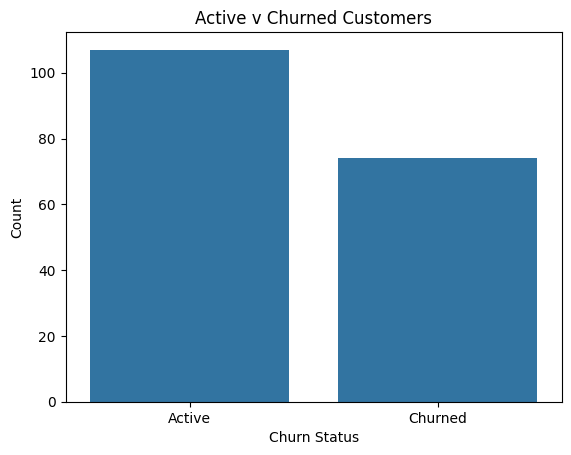

In [ ]:
Countplot(Dataset= Data_Agg, Variable= 'churned_category', xlabel= 'Churn Status', ylabel= 'Count', Title= 'Active v Churned Customers')

There is a slight class imbalanced between churned and Active customers. This will mean that any model created will most likely require the application of SMOTE - Synthetic Minority Oversampling Technique

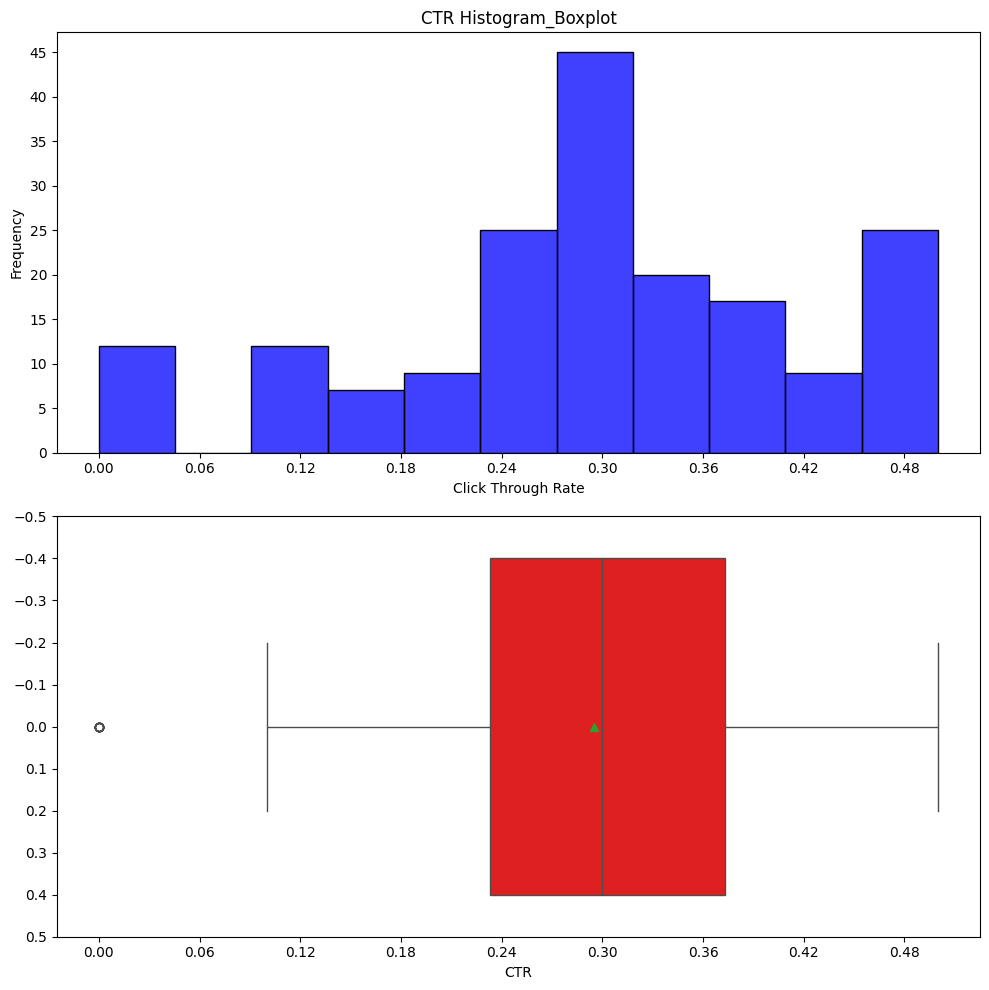

In [ ]:
Histogram_Boxplot(Dataset= Data_Agg, Variable = 'CTR', Title = 'CTR Histogram_Boxplot', Color1 = 'Blue', Color2 = 'Red', xlabel= 'Click Through Rate')

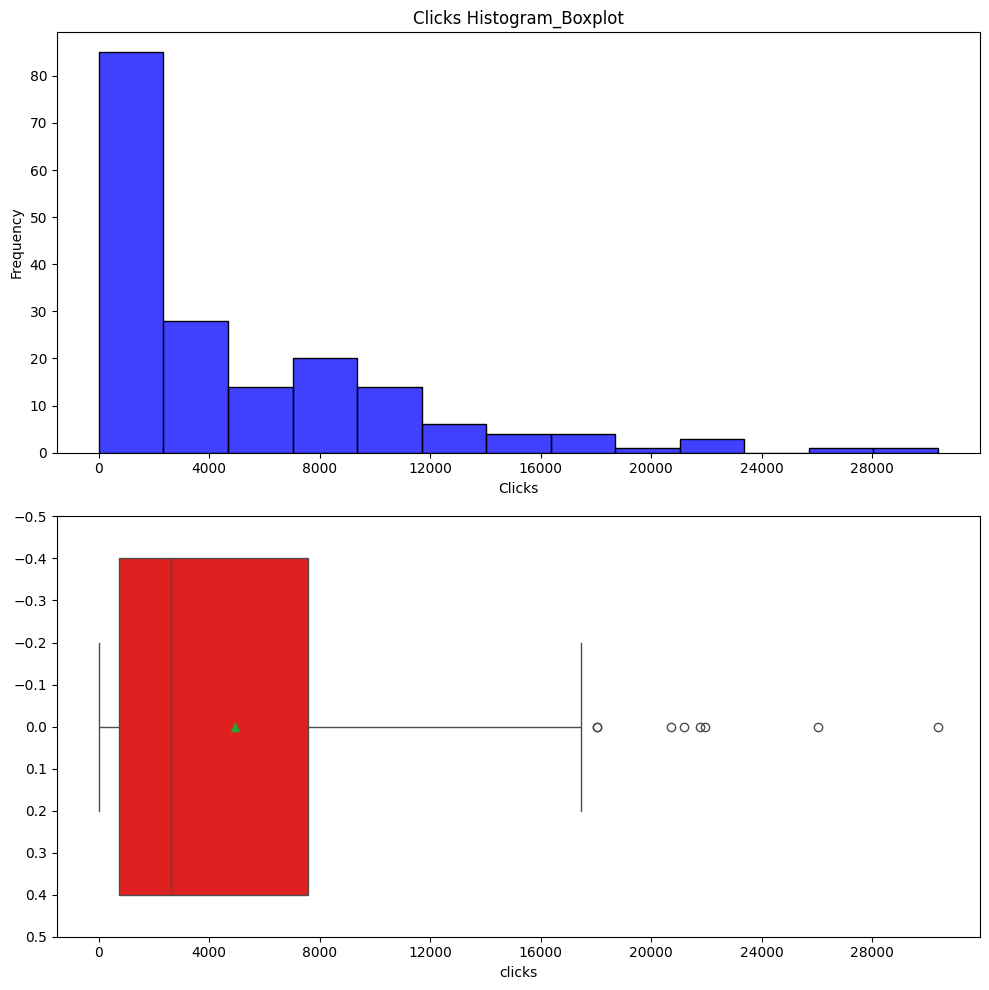

In [ ]:
Histogram_Boxplot(Dataset= Data_Agg, Variable = 'clicks', Title = 'Clicks Histogram_Boxplot', Color1 = 'Blue', Color2 = 'Red', xlabel= 'Clicks')

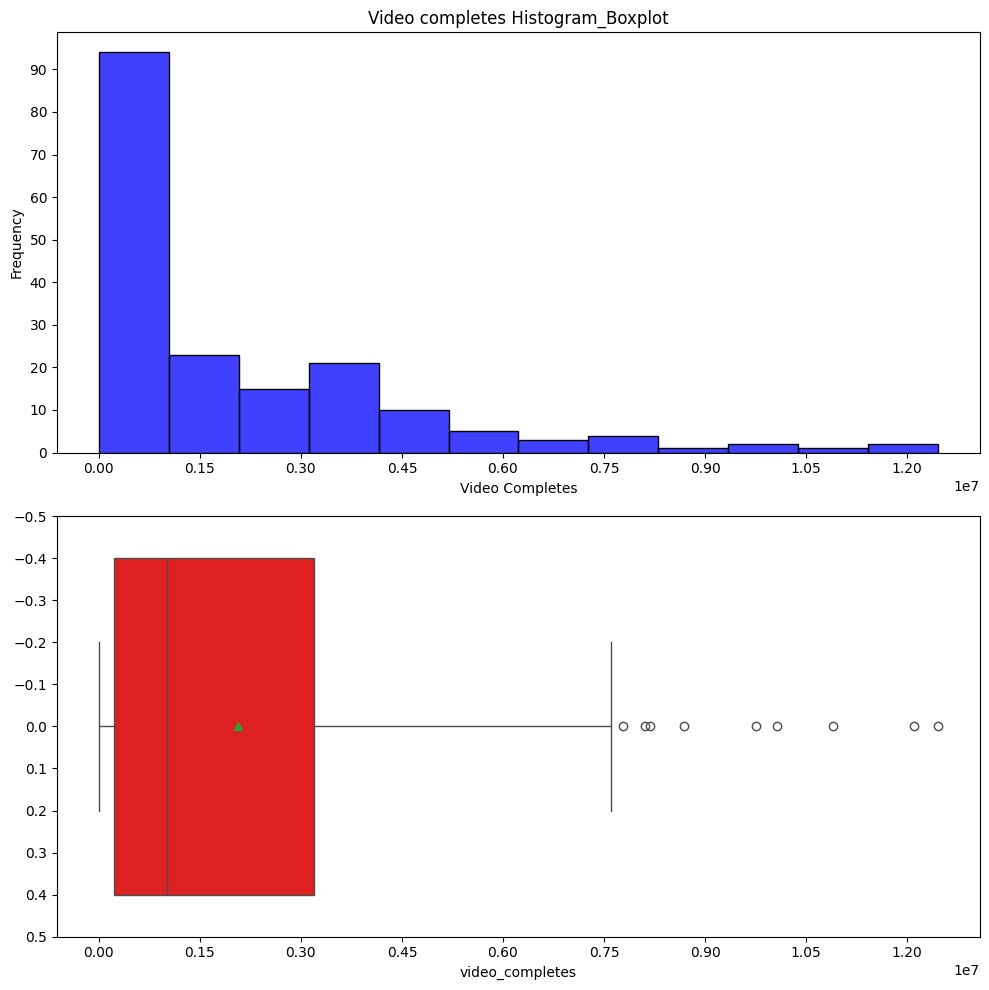

In [ ]:
Histogram_Boxplot(Dataset= Data_Agg, Variable = 'video_completes', Title = 'Video completes Histogram_Boxplot', Color1 = 'Blue', Color2 = 'Red', xlabel= 'Video Completes')

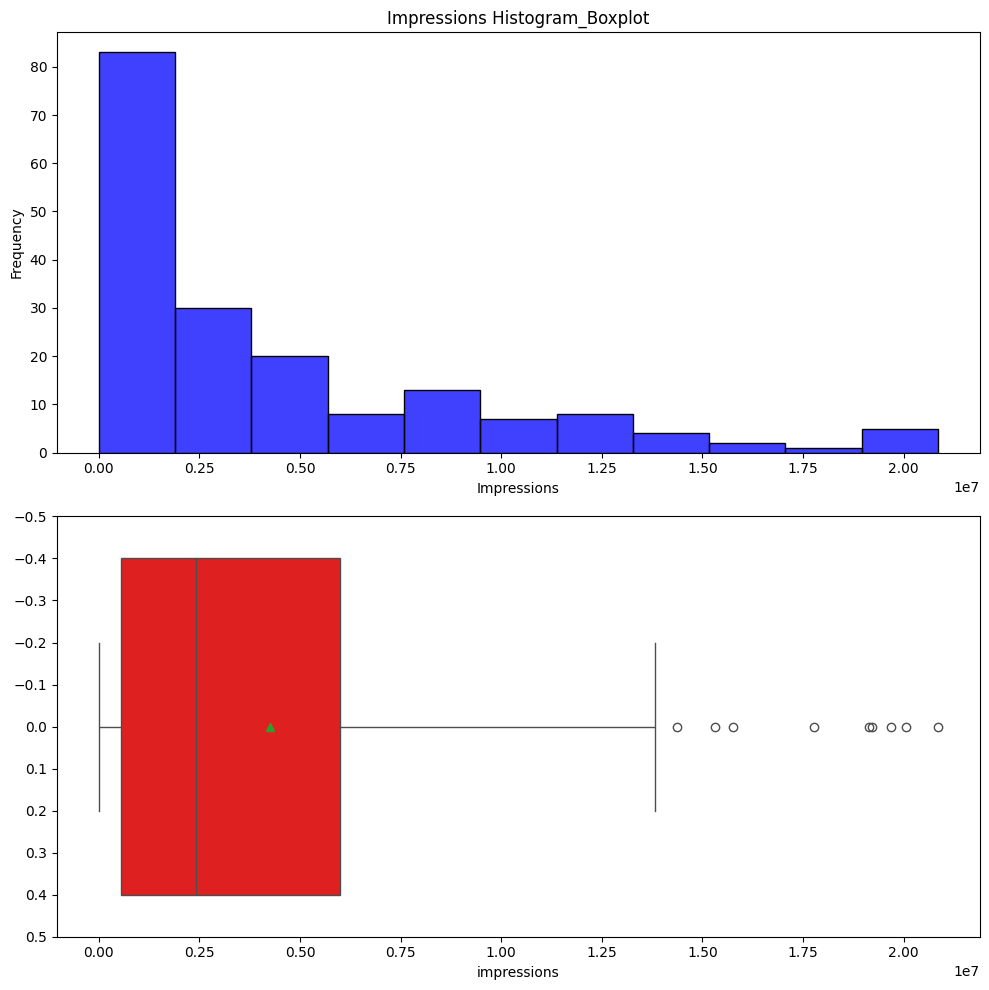

In [ ]:
Histogram_Boxplot(Dataset= Data_Agg, Variable = 'impressions', Title = 'Impressions Histogram_Boxplot', Color1 = 'Blue', Color2 = 'Red', xlabel= 'Impressions')

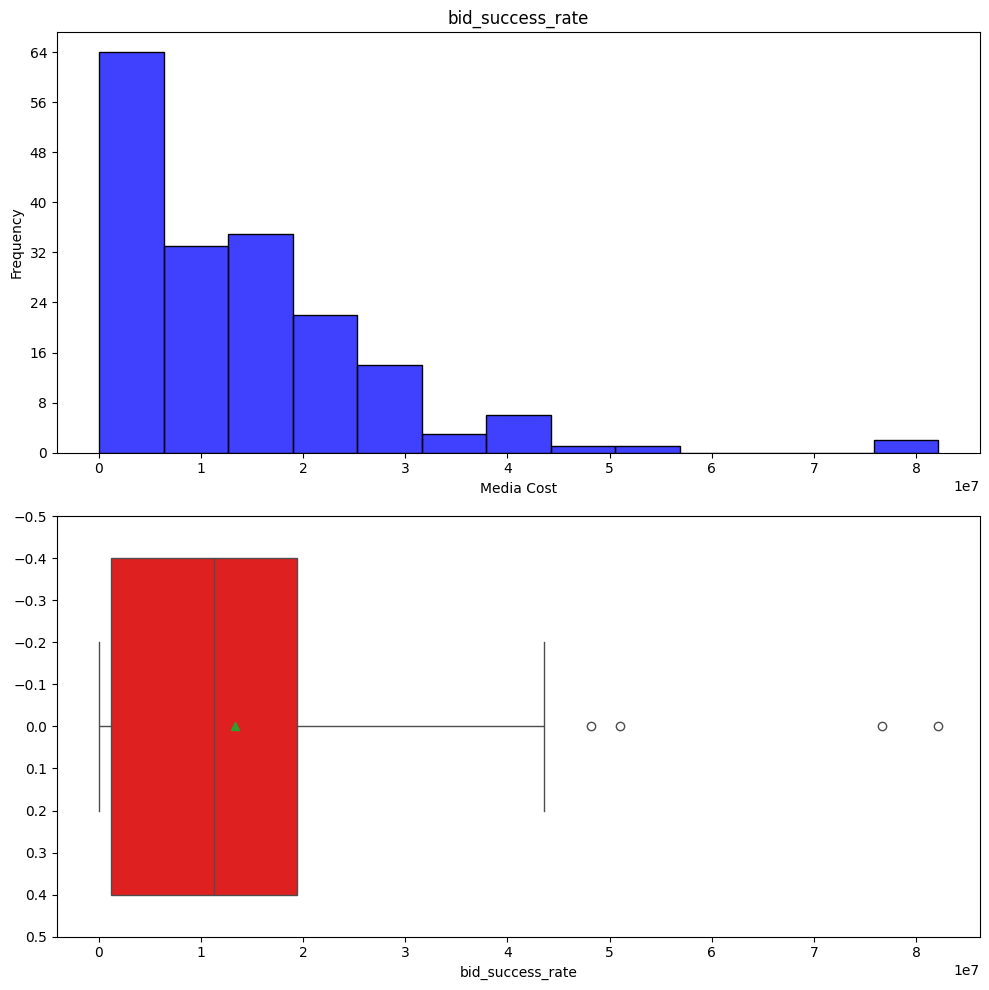

In [ ]:
Histogram_Boxplot(Dataset= Data_Agg, Variable = 'bid_success_rate', Title = 'bid_success_rate', Color1 = 'Blue', Color2 = 'Red', xlabel= 'Media Cost')

Bivariate Analysis

In [ ]:
#Building a function to automate barplots
def barplot(dataset, variable1, variable2, xlabel, ylabel, title):
    sns.barplot(x= variable1, y= variable2, data= dataset)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


#building function to automate corellation analysis

def correlaion_analysis(dataset, variable1, variable2, xlabel, ylabel, title):
    sns.regplot(x= variable1, y= variable2, data= dataset)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

#Automating Countplot for bivariate/mutivariate analysis

def multivar_countplot(dataset, variable1, xlabel, title, legend_title, hue):
    sns.countplot(x= variable1, data= dataset, hue = hue)
    plt.legend(loc='upper right', title = legend_title, fontsize = 'small')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

#Automating Heatmap

def heatmap(dataset, variables, title):
    sns.heatmap(dataset.corr(), annot= True, cmap= 'coolwarm', linewidths= 0.3, annot_kws= {'size': 7}, fmt='.2f')
    plt.title(title)
    plt.show()

Analysing the relationship between churn and media margin rate

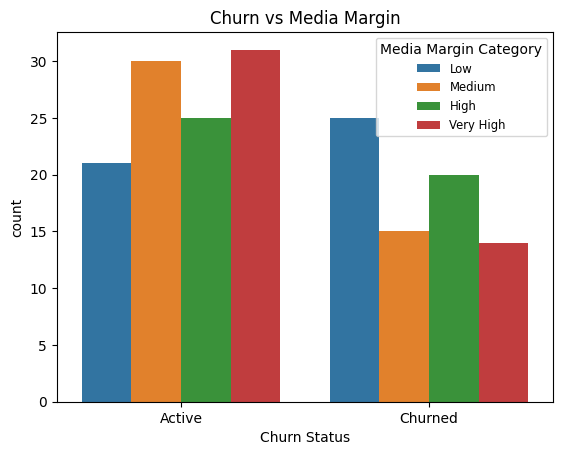

In [ ]:
multivar_countplot(dataset= Data_Agg, variable1= 'churned_category', xlabel= 'Churn Status', title= 'Churn vs Media Margin', hue= 'media_margin_category', legend_title= 'Media Margin Category')

In [ ]:
#Do cross tab here

pd.crosstab(index= Data_Agg['churned_category'], columns= Data_Agg['media_margin_category'], margins = True)
# Data_Agg[Data_Agg['media_margin_category_num'] == 'Low'].values_counts()
# Data_Agg[Data_Agg['churned_category']== 'Churned'].value_counts()


media_margin_category,Low,Medium,High,Very High,All
churned_category,,,,,
Active,21,30,25,31,107
Churned,25,15,20,14,74
All,46,45,45,45,181


From the pivot, we can see that advertisers in the lowest media margin quartile represent the least in terms of customers but are the highest in terms of churn represent the most churned group of customers.

In [ ]:
#multivar_countplot(dataset= Data_Agg, variable1= 'churned_category', xlabel='Media Category', ylabel= 'Count', title= 'Churn by Media Type', hue= 'media_type')

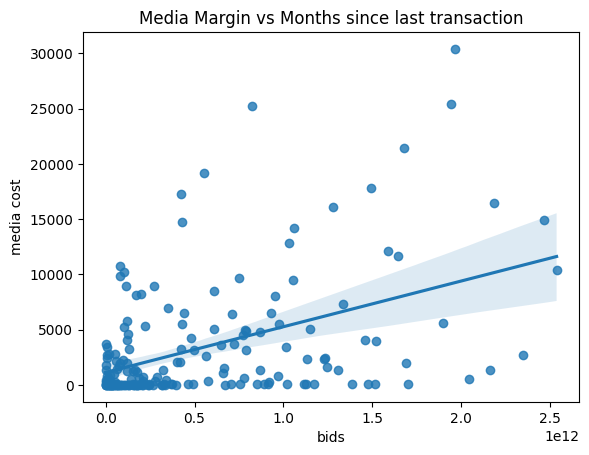

In [ ]:
correlaion_analysis(dataset= Data_Agg, variable1= 'bids', variable2= 'media_cost', xlabel= 'bids', ylabel= 'media cost', title= 'Media Margin vs Months since last transaction')

Multivariate Analysis

In [ ]:
#Creating a version of the dataset that only contains numerical variables. This will enable correlation analysis and model creation

Num_Data= Data_Agg.select_dtypes(include = np.number)
print(Num_Data.head())

   gross_spend  media_cost  impressions  video_completes   clicks  media_margin  CPC  CTR   VTR       bid_request           bids  bid_success_rate  months_since_last_transaction  churned
0     12704.96     8471.19      3559860       2189673.00  3353.10         33.23 5.00 0.12  0.00  6022480321404.00   612203155209       31891274.31                           3.70        0
1     14934.18     7343.72     10494118       4413376.72 20731.67         46.81 4.00 0.26 77.99 22720722647728.00  1333345362683        5718628.46                           1.60        0
2      6714.41     2745.45     19135059      12459698.93 12722.28         57.36 4.00 0.30 70.77 24843172032477.00  2351876589913       20344455.64                           1.60        0
3       169.35       92.47      5992370       2025564.60  7631.20         51.03 4.00 0.31 75.00 16386449370972.00  1516421046670       15608215.07                           1.60        0
4        60.16       35.20      1376988        881890.86  2532.87

**Anova Testing**

In [ ]:
pip install pingouin

In [ ]:
#Creating Function to automate Anova testing
import pingouin as pg

def ANOVA(dataset, dependent_variable, independent_variable):
  aov = pg.anova(dv= dependent_variable, between= independent_variable, data= dataset, detailed= True)
  print('Analysis of Variance \n', aov, '\n')

  #pairwise analysis
  pt = pg.pairwise_tukey(dv= dependent_variable, between= independent_variable, data= dataset)
  print('Pairwise Analysis \n', pt, '\n')

ANOVA test to check the whether they are statistically significant difference in the churn outcome of the various media_margin groups.

In [ ]:
ANOVA(dataset= Data_Agg, dependent_variable= 'churned', independent_variable= 'media_margin_category')

Analysis of Variance 
                   Source    SS   DF   MS    F  p-unc  np2
0  media_margin_category  1.58    3 0.53 2.21   0.09 0.04
1                 Within 42.17  177 0.24  NaN    NaN  NaN 

Pairwise Analysis 
         A          B  mean(A)  mean(B)  diff   se     T  p-tukey  hedges
0     Low     Medium     0.54     0.33  0.21 0.10  2.05     0.17    0.42
1     Low       High     0.54     0.44  0.10 0.10  0.97     0.77    0.20
2     Low  Very High     0.54     0.31  0.23 0.10  2.27     0.11    0.47
3  Medium       High     0.33     0.44 -0.11 0.10 -1.08     0.70   -0.22
4  Medium  Very High     0.33     0.31  0.02 0.10  0.22     1.00    0.05
5    High  Very High     0.44     0.31  0.13 0.10  1.30     0.57    0.27 



ANOVA test to check if the median_margin_category has effect on CTR

In [ ]:
ANOVA(dataset= Data_Agg, dependent_variable= 'CTR', independent_variable= 'media_margin_category')


Analysis of Variance 
                   Source   SS   DF   MS    F  p-unc  np2
0  media_margin_category 0.02    3 0.01 0.33   0.80 0.01
1                 Within 3.11  177 0.02  NaN    NaN  NaN 

Pairwise Analysis 
         A          B  mean(A)  mean(B)  diff   se     T  p-tukey  hedges
0     Low     Medium     0.30     0.29  0.01 0.03  0.34     0.99    0.07
1     Low       High     0.30     0.31 -0.01 0.03 -0.23     1.00   -0.05
2     Low  Very High     0.30     0.28  0.02 0.03  0.71     0.89    0.14
3  Medium       High     0.29     0.31 -0.02 0.03 -0.56     0.94   -0.13
4  Medium  Very High     0.29     0.28  0.01 0.03  0.37     0.98    0.08
5    High  Very High     0.31     0.28  0.03 0.03  0.93     0.79    0.19 



ANOVA test to check if segment type has statistically significant impact on CTR

C

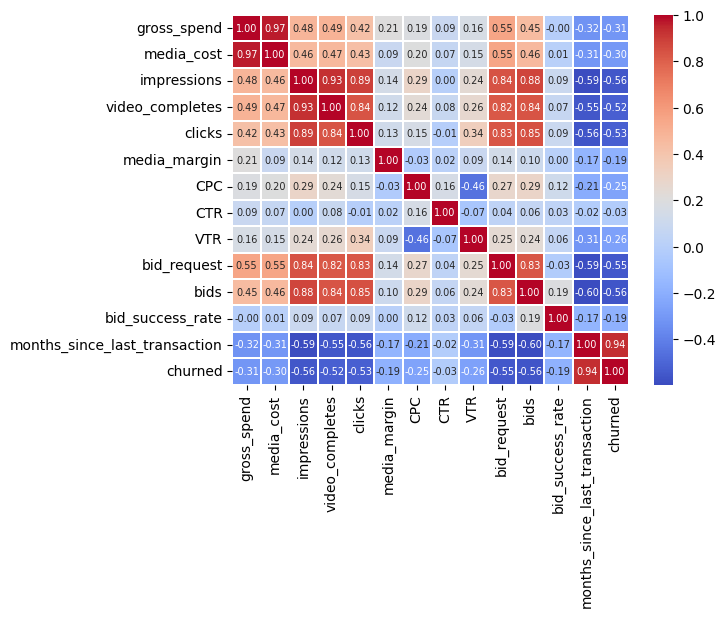

<Figure size 2000x1000 with 0 Axes>

In [ ]:
sns.heatmap(Num_Data.corr(), annot= True, cmap= 'coolwarm', linewidths= 0.3, annot_kws= {'size': 7}, fmt='.2f')
plt.show()
plt.figure(figsize= (20,10))
plt.show()

In [ ]:
#Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = pd.DataFrame()
VIF['Variables'] = Num_Data.columns.to_list()
VIF['VIF'] = [variance_inflation_factor(Num_Data.values, i) for i in range(Num_Data.shape[1])]
print(VIF)

                        Variables   VIF
0                     gross_spend 21.33
1                      media_cost 20.72
2                     impressions 13.76
3                 video_completes  8.33
4                          clicks  6.73
5                    media_margin  0.57
6                             CPC  1.77
7                             CTR  1.01
8                             VTR  1.53
9                     bid_request  9.86
10                           bids  6.22
11               bid_success_rate  1.21
12  months_since_last_transaction  8.20
13                        churned  8.38


In [ ]:

Log_num = Num_Data.drop(columns=['bid_request', 'bids', 'impressions', 'media_cost', 'months_since_last_transaction'])
Log_num.head()

,gross_spend,video_completes,clicks,media_margin,CPC,CTR,VTR,bid_success_rate,churned
0,12704.96,2189673.00,3353.10,33.23,5.00,0.12,0.00,31891274.31,0
1,14934.18,4413376.72,20731.67,46.81,4.00,0.26,77.99,5718628.46,0
2,6714.41,12459698.93,12722.28,57.36,4.00,0.30,70.77,20344455.64,0
3,169.35,2025564.60,7631.20,51.03,4.00,0.31,75.00,15608215.07,0
4,60.16,881890.86,2532.87,41.95,0.00,0.36,74.13,15781298.47,0


In [ ]:
VIF = pd.DataFrame()
VIF['Variables'] = Log_num.columns.to_list()
VIF['VIF'] = [variance_inflation_factor(Log_num.values, i) for i in range(Log_num.shape[1])]
VIF

,Variables,VIF
0,gross_spend,1.90
1,video_completes,6.50
2,clicks,6.39
3,media_margin,10.12
4,CPC,3.16
5,CTR,5.78
6,VTR,4.31
7,bid_success_rate,2.05
8,churned,2.16


Building Logistic Regression Model

In [ ]:
from sklearn.preprocessing import QuantileTransformer #to scale the data according to certain values
from sklearn.linear_model import LogisticRegression #To fit the data
from sklearn.model_selection import train_test_split #To split test and training data
from sklearn.metrics import confusion_matrix, classification_report #To assess model accuracy
from imblearn.over_sampling import SMOTE #To deal with class imbalance

In [ ]:
Scale = QuantileTransformer()
Scaled_Data = Scale.fit_transform(Log_num)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (181). n_quantiles is set to n_samples.
  warnings.warn(


In [ ]:
#Convert back into dataframe)

Model_Data = pd.DataFrame(Scaled_Data, columns= Log_num.columns)
Model_Data.head()

,gross_spend,video_completes,clicks,media_margin,CPC,CTR,VTR,bid_success_rate,churned
0,0.81,0.67,0.56,0.10,0.91,0.13,0.00,0.93,0.00
1,0.87,0.86,0.97,0.47,0.61,0.32,0.77,0.34,0.00
2,0.71,1.00,0.91,0.86,0.61,0.40,0.54,0.79,0.00
3,0.34,0.64,0.76,0.73,0.61,0.57,0.67,0.63,0.00
4,0.19,0.47,0.49,0.31,0.00,0.71,0.61,0.63,0.00


In [ ]:
#Training and Split the data

X = Model_Data.drop(columns= ['churned'])
y = Model_Data['churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [ ]:
#Apply SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
LR = LogisticRegression()
LR.fit(X_smote, y_smote)

Coefs = pd.DataFrame()
Coefs['Variable'] = X.columns
Coefs['Coefficients'] = LR.coef_.flatten()
Coefs['odds ratio'] = np.exp(Coefs['Coefficients'])
Coefs['Percentage Change'] = np.where(Coefs['odds ratio']>1, (Coefs['odds ratio'] - 1) *100, (1- Coefs['odds ratio'])*100)
Coefs.sort_values(by= 'Percentage Change', ascending= False, inplace= True)
print(Coefs)

           Variable  Coefficients  odds ratio  Percentage Change
1   video_completes         -2.16        0.12              88.45
2            clicks         -2.02        0.13              86.67
4               CPC         -1.61        0.20              80.02
6               VTR         -1.37        0.26              74.50
7  bid_success_rate         -0.85        0.43              57.19
3      media_margin         -0.67        0.51              49.00
0       gross_spend         -0.65        0.52              47.66
5               CTR         -0.16        0.85              14.83


In [ ]:
y_pred = LR.predict(X_test)
round(LR.score(X_test, y_test),2)

0.78

Random Forest model


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = Num_Data.drop(columns= ['churned'])
y = Data_Agg['churned']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [ ]:
smote = SMOTE(sampling_strategy = 'minority', random_state= 42)
X_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_smote, y_smote)

RF_Features = pd.DataFrame(RF.feature_importances_, index= X.columns)
RF_Features

,0
gross_spend,0.03
media_cost,0.02
impressions,0.10
video_completes,0.10
clicks,0.07
media_margin,0.02
CPC,0.01
CTR,0.01
VTR,0.01
bid_request,0.06


In [ ]:
RF.score(X_test, y_test)

1.0